# Introduction to Numerical Solution of Differential Equations: Euler's Method

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Euler's Idea

The mathematician Leonard Euler developed a wonderful and intuitive method for solving first order differential equations. Suppose we are given the differential equation

$$
\dot{x}(t) \equiv \frac{dx}{dt}(t)=f(t, x(t)),
$$

with $f(t, x(t))$ a given function. The idea is simply to approximate the derivative as a finite difference:

$$
\frac{dx}{dt}(t) = \lim_{h \rightarrow 0} \frac{x(t+h)-x(t)}{h} \approx \frac{x(t+h)-x(t)}{h},
$$

where the approximation holds for finite, but small $h$. Using this result,

$$
\dot{x}(t) \approx \frac{x(t+h)-x(t)}{h},
$$

we can algebraically solve for $x(t+h)$. The solution is 

$$
x(t+h) \approx h \cdot \dot{x}(t) +x(t) = h \cdot f(t, x(t))+x(t).
$$
In this way we have found the position after a time step $h$ has elapsed, $x(t+h)$, from the position at our initial time $x(t)$.

In the final formula we are supposed to think of $f(t, x(t))$ as given when the differential equation was first specified. This means that once we are given an initial value of $x(t)$ at some time, we can successively find it after one time step $h$, then after another step and another and so on. This gives us $x(t)$ for all future times. 

Below I use a simple differential equation as an example of this technique. It is valuable to first solve this equation analytically, so that you have something with which to compare the numerics.

<b>Exercise (a):</b> Solve the first order differential equation $\dot{x} = -\lambda x$ using separation of variables, subject to the initial condition $x(0) = x_0$. Again the shorthand $\dot{x}$ just means $\dot{x} \equiv dx/dt$.

## Implementing the algorithm

Suppose we want to solve this equation numerically

$$
\dot{x}(t) = - \lambda x(t), 
$$
and that it is subject to the initial condition $x(0) = 10$ and has $\lambda=2$. Let's pick a small time step, say $h=0.25$, and evolve this initial condition. Stepping from $t=0$ to $t=0.25$, i.e. following one time step, we have 

$$
x(0+0.25) = 0.25 \cdot \dot{x}(0)+x(0) = 0.25 \cdot (-\lambda x(0))+x(0) = 0.25 \cdot (-2 (10))+10 = 5. 
$$

We could repeat this process again and again, but clearly that is a task for a computer. So, let's write a code to do it. 

First we need to break the full time interval into steps:

In [3]:
tvals = np.linspace(0.,10.,41)
print(tvals[0])
print(tvals[1])

0.0
0.25


Notice that because linspace includes the left endpoint, I needed to ask for 41, not 40 points for this to work. 

Now we can use our numerical integration scheme from above:

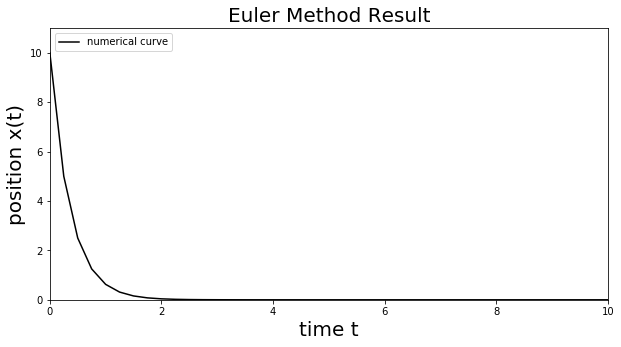

In [7]:
tvals = np.linspace(0.,10.,41)
x = np.zeros(len(tvals))
x[0]=x0=10
lam=2
h=0.25
for i in range(len(tvals)-1):
    x[i+1]=h*(-lam*x[i])+x[i];
    
plt.figure(figsize=(10,5))
plt.plot(tvals,x, 'k-', label="numerical curve")
plt.legend(loc="upper left")
plt.ylabel('position x(t)',fontsize=20)
plt.xlabel('time t',fontsize=20)
plt.title('Euler Method Result',fontsize=20)
plt.xlim(0, 10)
plt.ylim(0, 11)
plt.show()

<b>Exercise (b)</b>: Plot the result of the numerical code above together with your analytical solution from part (a). Why doesn't the numerical code agree with your analytical solution very well? Adjust the code so that it gives a much better agreement. [Hint: I've chosen a large step size. You'll have to adjust the code in a couple of places to give yourself a more reasonable step size.]

<b>Exercise (c)</b>: Wonderfully, unlike the analytical methods that we often study, these numerical techniques can immediately be used to solve nonlinear differential equations. Solve the differential equation

$$
\dot{x}(t) =  x^2
$$

using the Euler method. Take the initial condition $x(0)=0.1$. 

Because this equation is first order, you can also solve it analytically, although you can't use the standard, exponential, guess. Solve this equation using separation of variables and integration and compare your analytical to your numerical solution. 